In [66]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install replicate

In [67]:
import os
import replicate
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

In [68]:
os.environ["REPLICATE_API_TOKEN"] = "token"

In [69]:
df = pd.read_csv("/content/test.csv")

In [70]:
df

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [72]:
df.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [73]:
df.isnull().sum()

,0
id,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0


In [74]:
df.duplicated().sum()

np.int64(0)

In [75]:
X = df.drop(columns=["id"])

In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

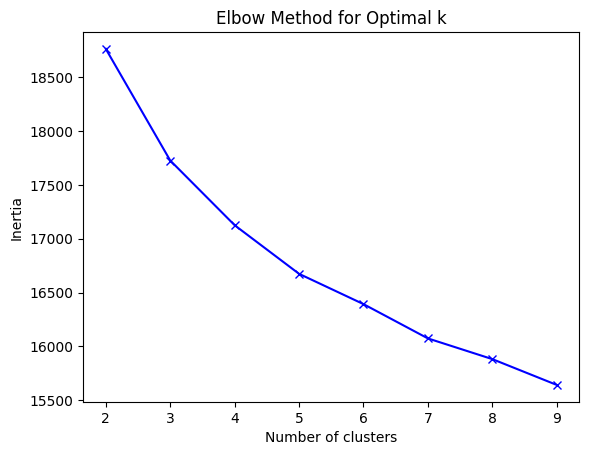

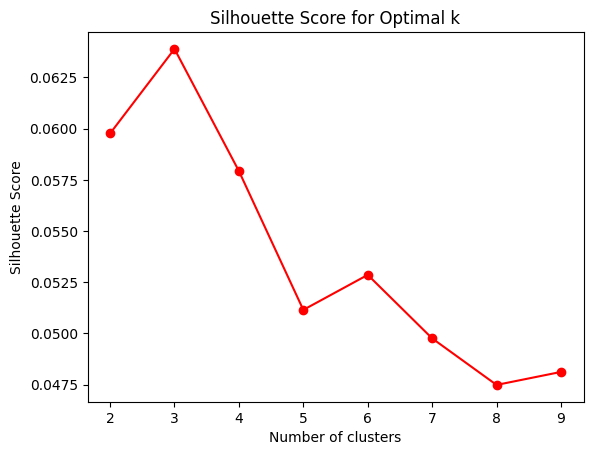

In [77]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Coba range cluster 2-10
inertia = []
silhouette = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow (Inertia)
plt.plot(K, inertia, "bx-")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Plot Silhouette
plt.plot(K, silhouette, "ro-")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()

In [78]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)
cluster_summary = df.groupby("cluster").mean()

print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
                  id  battery_power      blue  ...  three_g  touch_screen      wifi
cluster                                       ...                                 
0        475.311475    1224.532787  0.504098  ...      0.0      0.500000  0.528689
1        499.803970    1238.009926  0.583127  ...      1.0      0.461538  0.565757
2        518.705382    1277.070822  0.447592  ...      1.0      0.543909  0.424929

[3 rows x 21 columns]


In [79]:
cluster_counts = df["cluster"].value_counts().sort_index()

print("Amounts of data per cluster:")
print(cluster_counts)

Amounts of data per cluster:
cluster
0    244
1    403
2    353
Name: count, dtype: int64


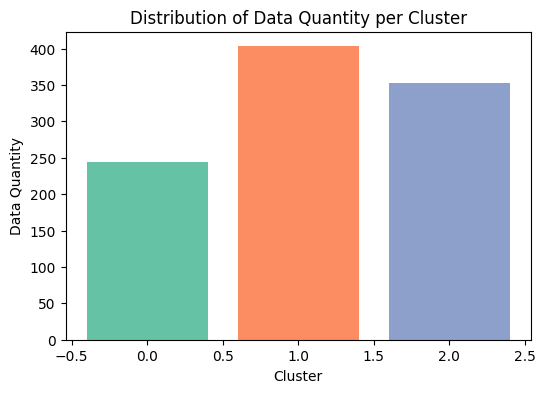

In [80]:
# Bar Chart
plt.figure(figsize=(6,4))
plt.bar(cluster_counts.index, cluster_counts.values, color=["#66c2a5","#fc8d62","#8da0cb"])
plt.xlabel("Cluster")
plt.ylabel("Data Quantity")
plt.title("Distribution of Data Quantity per Cluster")
plt.show()

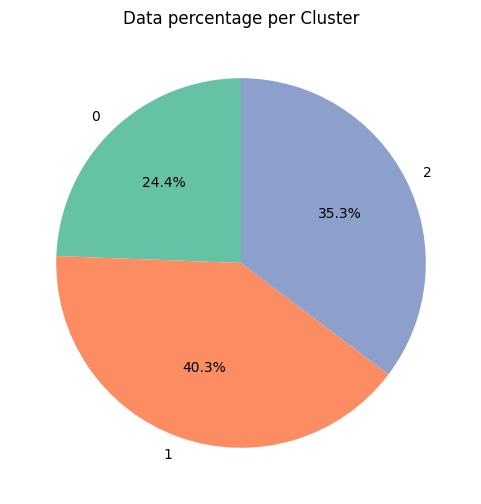

In [81]:
# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(cluster_counts.values, labels=cluster_counts.index, autopct="%1.1f%%",
        colors=["#66c2a5","#fc8d62","#8da0cb"], startangle=90)
plt.title("Data percentage per Cluster")
plt.show()

In [82]:
cluster_labels = {
    0: "Budget",
    1: "Mid-range",
    2: "Premium"
}

df["cluster_label"] = df["cluster"].map(cluster_labels)

In [83]:
for cluster_id, label in cluster_labels.items():
    cluster_df = df[df["cluster"] == cluster_id]
    file_name = f"cluster_{cluster_id}_{label}.csv"
    cluster_df.to_csv(file_name, index=False)
    print(f"Cluster {cluster_id} ({label}) with {len(cluster_df)} data is saved to {file_name}")

Cluster 0 (Budget) with 244 data is saved to cluster_0_Budget.csv
Cluster 1 (Mid-range) with 403 data is saved to cluster_1_Mid-range.csv
Cluster 2 (Premium) with 353 data is saved to cluster_2_Premium.csv


In [84]:
output_excel = "classified_clusters.xlsx"
with pd.ExcelWriter(output_excel, engine="openpyxl") as writer:
    for cluster_id, label in cluster_labels.items():
        cluster_df = df[df["cluster"] == cluster_id]
        sheet_name = f"{label} ({cluster_id})"
        cluster_df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"\nAll clusters are saved to: {output_excel}")


All clusters are saved to: classified_clusters.xlsx


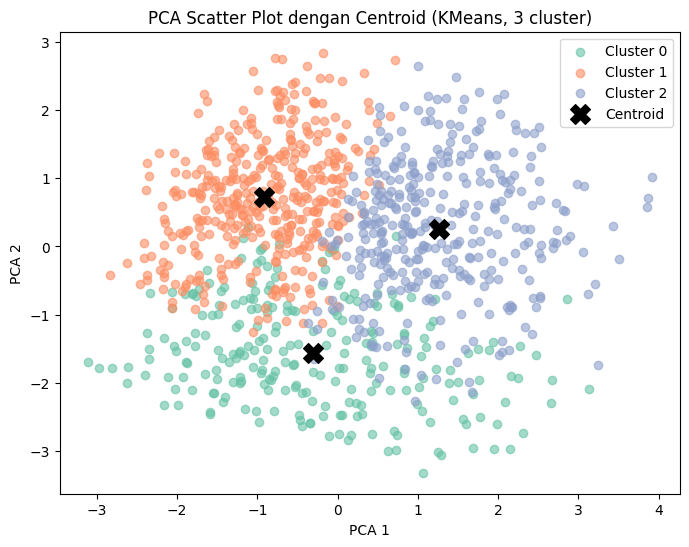

In [85]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(8,6))
colors = ["#66c2a5","#fc8d62","#8da0cb"]

for cluster_id in df["cluster"].unique():
    cluster_points = X_pca[df["cluster"] == cluster_id]
    plt.scatter(cluster_points[:,0], cluster_points[:,1],
                label=f"Cluster {cluster_id}", alpha=0.6, color=colors[cluster_id])

plt.scatter(centroids_pca[:,0], centroids_pca[:,1],
            c="black", marker="X", s=200, label="Centroid")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Scatter Plot dengan Centroid (KMeans, 3 cluster)")
plt.legend()
plt.show()

In [86]:
cluster_summary_str = cluster_summary.to_string()

prompt = f"""
You are an AI assistant that classifies mobile phone clusters into human-readable categories.
We have 3 clusters from KMeans, with the following average specifications:

{cluster_summary_str}

Please assign each cluster into one of these categories:
- Budget phone
- Mid-range phone
- Premium phone

Also provide a short explanation for why you assigned each category.
"""

output = replicate.run(
    "ibm-granite/granite-3.3-8b-instruct",
    input={"prompt": prompt}
)

print("=== Cluster Classification ===\n", "".join(output))

=== Cluster Classification ===
 Based on the given average specifications, here are the categories for each cluster:

1. Cluster 0 - Budget phone: This cluster has the lowest battery power, internal memory, and talk time among the three, along with fewer cores and lower pixel dimensions. These specifications suggest a more basic, cost-effective device.

2. Cluster 1 - Mid-range phone: This cluster has a moderate battery power, internal memory, and talk time, with dual-SIM and 3G capabilities. It also has a decent number of cores and a touchscreen. These features indicate a mid-range device, offering better specifications than budget phones but not reaching the high-end premium category.

3. Cluster 2 - Premium phone: This cluster has the highest battery power, internal memory, and talk time, along with more cores, larger pixel dimensions, and 4G capability. These specifications suggest a high-end, feature-rich device, classifying it as a premium phone.

Keep in mind that these categori

In [87]:
xls = pd.ExcelFile("/content/classified_clusters.xlsx")
print(xls.sheet_names)

['Budget (0)', 'Mid-range (1)', 'Premium (2)']


In [88]:
# Load sheets into dictionary
xls = pd.ExcelFile("/content/classified_clusters.xlsx")
dfs = {sheet: pd.read_excel(xls, sheet_name=sheet) for sheet in xls.sheet_names}

# Checking amount of data in every sheet
for name, df in dfs.items():
    print(f"Sheet: {name}, Amount of data: {len(df)}")

Sheet: Budget (0), Amount of data: 244
Sheet: Mid-range (1), Amount of data: 403
Sheet: Premium (2), Amount of data: 353


In [89]:
all_data = []
for name, df_sheet in dfs.items():
    df_sheet["label"] = name.split()[0]
    all_data.append(df_sheet)

df = pd.concat(all_data, ignore_index=True)
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,cluster,cluster_label,label
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,0,Budget,Budget
1,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,0,Budget,Budget
2,7,1718,0,2.4,0,1,0,47,1.0,156,2,3,1283,1374,3873,14,2,10,0,0,0,0,Budget,Budget
3,8,833,0,2.4,1,0,0,62,0.8,111,1,2,1312,1880,1495,7,2,18,0,1,1,0,Budget,Budget
4,11,1500,0,2.2,0,2,0,55,0.6,80,7,6,503,1336,3866,13,7,20,0,1,0,0,Budget,Budget


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Separate X (features) and y (target/label)
X = df.drop(columns=["cluster", "cluster_label", "label"])
y = df["label"]

# Split data train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 4. Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.965

Classification Report:
               precision    recall  f1-score   support

      Budget       1.00      1.00      1.00        42
   Mid-range       0.96      0.95      0.96        86
     Premium       0.95      0.96      0.95        72

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.96      0.97       200



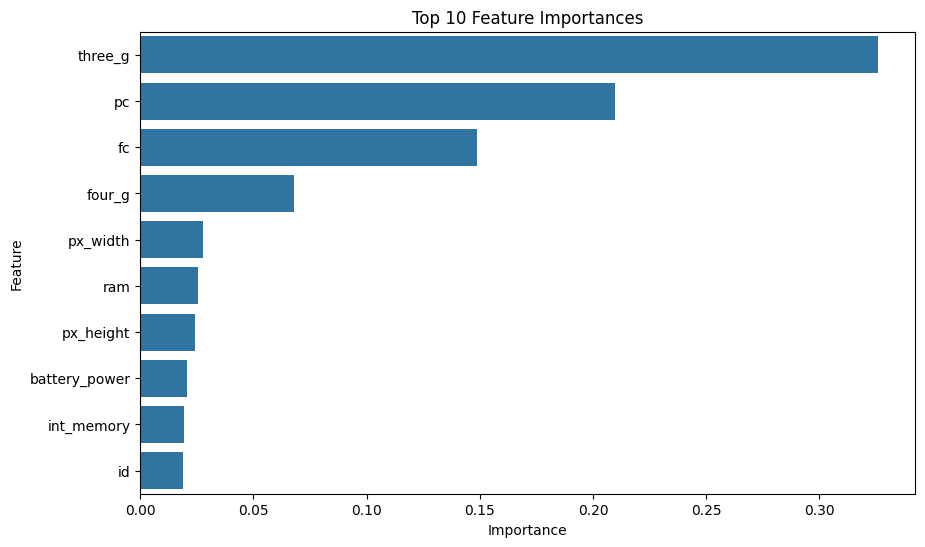

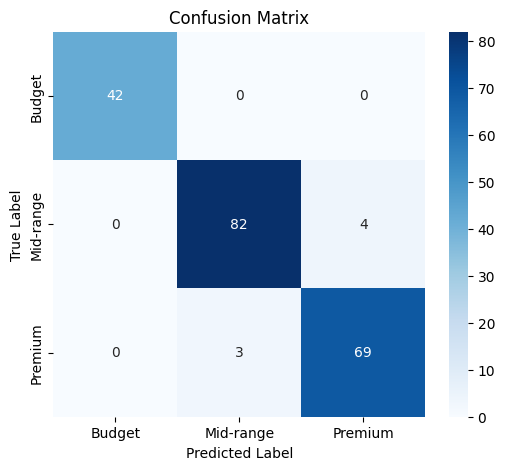

In [92]:
from sklearn.metrics import confusion_matrix

# Feature Importance
importances = model.feature_importances_
features = X.columns

# Ranked from most influential
indices = importances.argsort()[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=features[indices][:10])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()